# Synthetic EOG Data Demo

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, detrend

In [4]:
# 1. Generate synthetic EOG-like signal

def generate_synthetic_eog(duration=10, sampling_rate=250):
    """Generate a synthetic EOG signal with blinks and eye movements."""
    t = np.linspace(0, duration, int(sampling_rate * duration))
    signal = np.zeros_like(t)

    # Add slow eye movement waves (low frequency component)
    signal += 0.4 * np.sin(2 * np.pi * 0.3 * t)
    signal += 0.3 * np.sin(2 * np.pi * 0.1 * t + np.pi / 4)

    # Add eye blinks (sharp peaks)
    blink_times = np.random.uniform(1, duration - 1, size=8)
    for blink_time in blink_times:
        blink_idx = int(blink_time * sampling_rate)
        blink_shape = np.exp(-np.linspace(0, 1, 30) * 10)
        signal[blink_idx:blink_idx + 30] += blink_shape

    # Add noise
    noise = 0.05 * np.random.randn(len(t))
    signal += noise

    return t, signal

In [5]:
# 2. Butterworth bandpass filter

def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low, high = lowcut / nyquist, highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

In [6]:
# 3. Plotting function


def plot_eog_signals(t, raw_signal, filtered_signal, sampling_rate):
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(t, raw_signal, color='gray')
    plt.title("Raw Synthetic EOG Signal")
    plt.ylabel("Amplitude (V)")

    plt.subplot(2, 1, 2)
    plt.plot(t, filtered_signal, color='blue')
    plt.title("Filtered EOG Signal (0.1–30 Hz Bandpass)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (V)")

    plt.tight_layout()
    plt.show()


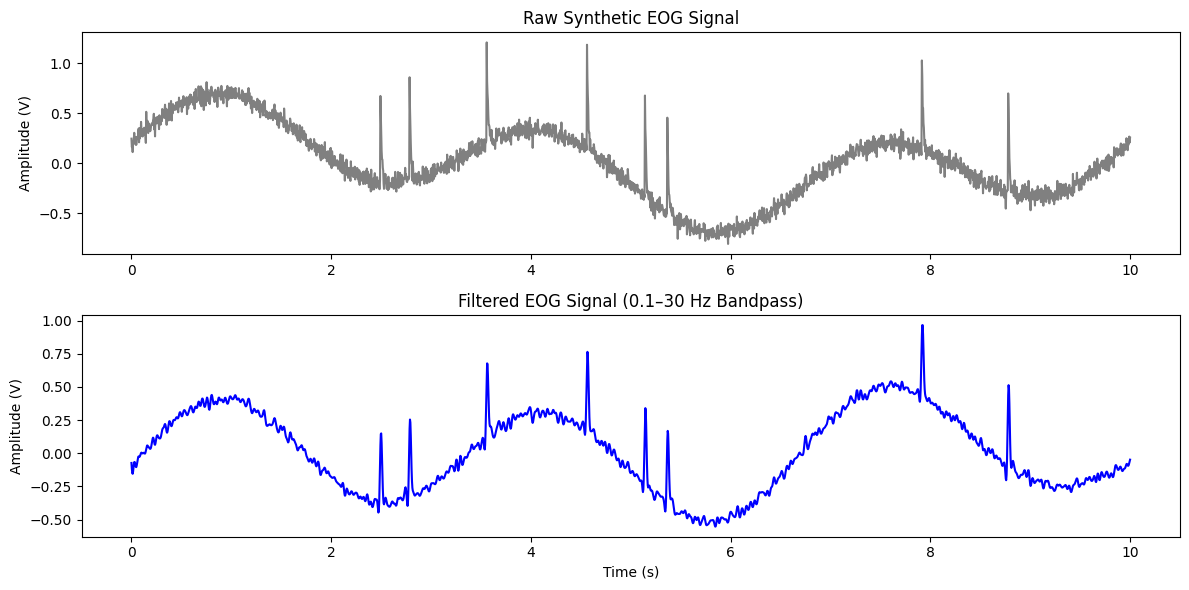

In [7]:
sampling_rate = 250
t, raw_signal = generate_synthetic_eog(duration=10, sampling_rate=sampling_rate)

# Detrend and filter
raw_signal_detrended = detrend(raw_signal)
filtered_signal = bandpass_filter(raw_signal_detrended, lowcut=0.1, highcut=30, fs=sampling_rate)

# Plot results
plot_eog_signals(t, raw_signal, filtered_signal, sampling_rate)